In [4]:
%matplotlib inline
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# conn = engine.connect()
# data = pd.read_sql("SELECT * FROM hawaii", conn)


In [9]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
# for row in session.query(Measurement, Measurement.).limit(5).all():
#     print(row)


In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [13]:
# Calculate the date 1 year ago from the last data point in the database
# Latest Date
print(session.query(Measurement.date).order_by(Measurement.date.desc()).first())

# Perform a query to retrieve the data and precipitation scores




('2017-08-23',)


In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_data=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(prcp_data)

prcp_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


In [16]:
# Sort the dataframe by date
prcp_df.set_index("date")
prcp_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2221,2017-08-23,0.08


<IPython.core.display.Javascript object>


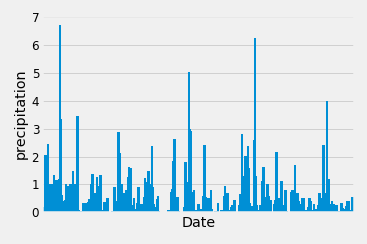

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
# x=prcp_df['date']
# y=prcp_df['prcp']
# prcp_df.plot('date', 'prcp', kind='bar')
# plt.show()
# x_labels=['2016-08-24','2016-10-24','2016-12-24','2017-02-24','2017-4-24','2017-06-24','2017-08-23']
fig, ax = plt.subplots()
ax.bar(prcp_df['date'], prcp_df['prcp'], width=3)
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.xlim('2016-08-24','2017-08-23')
plt.ylabel("precipitation")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(prcp_df.describe(),3)

,prcp
count,2015.000
mean,0.176
std,0.460
min,0.000
25%,0.000
50%,0.020
75%,0.130
max,6.700


In [19]:
# Design a query to show how many stations are available in this dataset?
print(session.query(Station.id).count())

9


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# session.query(Measurement, Station).filter(Measurement.station).value_counts()
station_count=session.query(func.count(Measurement.station).label('count'), Measurement.station).group_by(Measurement.station).all()
station_df=pd.DataFrame(station_count)
station_df.sort_values(by='count', ascending=False)

,count,station
6,2772,USC00519281
7,2724,USC00519397
1,2709,USC00513117
8,2669,USC00519523
3,2612,USC00516128
2,2202,USC00514830
0,1979,USC00511918
4,1372,USC00517948
5,511,USC00518838


In [67]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
low_temp= session.query(func.min(Measurement.tobs).label('low'), Measurement.station).all()
print(f'LOW TEMP = {low_temp}')
high_temp= session.query(func.max(Measurement.tobs).label('high'), Measurement.station).all()
print(f'HIGH TEMP= {high_temp}')
avg_temp= session.query(func.avg(Measurement.tobs).label('avg'), Measurement.station).\
filter(Measurement.station == 'USC00519281').all()
print(f'AVG TEMP @ MOST ACTIVE STATION {avg_temp}')

LOW TEMP = [(53.0, 'USC00511918')]
HIGH TEMP= [(87.0, 'USC00519397')]
AVG TEMP @ MOST ACTIVE STATION [(71.66378066378067, 'USC00519281')]


In [71]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temps = [Measurement.date, func.avg(Measurement.tobs).label('temp')]
         
LTM_temps = session.query(*temps).\
    filter(Measurement.date > '2016-08-09').\
    filter(Measurement.station == 'USC00519281').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()
    
df=pd.DataFrame(LTM_temps)
df

,date,temp
0,2016-08-10,82.0
1,2016-08-11,80.0
2,2016-08-12,76.0
3,2016-08-13,80.0
4,2016-08-14,76.0
...,...,...
360,2017-08-14,77.0
361,2017-08-15,77.0
362,2017-08-16,76.0
363,2017-08-17,76.0


<IPython.core.display.Javascript object>


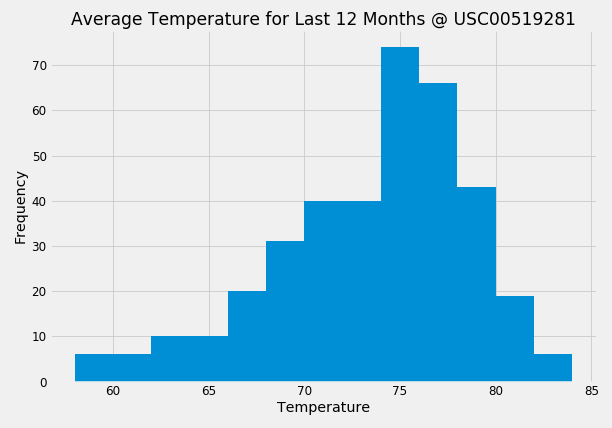

In [80]:
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(df['temp'], bins = [58, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84]) 
plt.ylabel('Frequency') 
plt.title('Average Temperature for Last 12 Months @ USC00519281')
plt.xlabel('Temperature')
plt.tight_layout()
plt.show() 

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
